In [1]:
import pandas as pd
import numpy as np

import pyodbc
import configparser


config = configparser.ConfigParser()
config.read(r"C:\Users\joao.herculano\Documents\Enviador de email\credenciais.ini")

conn = pyodbc.connect(
    f"DRIVER={{SQL Server}};"
    f"SERVER={config['banco']['host']},1433;"
    f"DATABASE=GINSENG;"
    f"UID={config['banco']['user']};"
    f"PWD={config['banco']['password']}"
)

In [2]:
query = '''
select
	bvb.[DATA],
	bvb.pdv,
	bvb.SKU ,
	cast(replace(bvb.VENDAS,'.','') as int) as Vendas,
	em.ORIGEM
from base_vendas_bi bvb 
left join (
select *
from
estoque_mar
where origem is not null) em on cast(em.SKU as int) = cast(replace(bvb.SKU,'.','') as int) and cast( em.pdv as int) = cast(bvb.PDV as int)
WHERE EM.CATEGORIA not in ('SUPORTE À VENDA','EMBALAGENS') AND bvb.[DATA] >'2024-01-01'
'''
df_vendas = pd.read_sql(query, conn)
conn.close()

C:\Users\joao.herculano\AppData\Local\Temp\ipykernel_39028\3030190625.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vendas = pd.read_sql(query, conn)


In [3]:
#df_vendas = pd.read_csv(r"C:\Users\joao.herculano\OneDrive - GRUPO GINSENG\Documentos\CONSULTAS BANCO DE DADOS\VENDAS 2025.csv",decimal=',',sep=';')

In [4]:
df_vendas

DATA    pdv    SKU  Vendas ORIGEM
0        2025-07-08  23706  51231       1    BOT
1        2025-07-07  23706  51231       0    BOT
2        2025-07-05  23706  87321       1    BOT
3        2025-07-09  23706  87321       1    BOT
4        2025-07-04  23706  87321       2    BOT
...             ...    ...    ...     ...    ...
4607343  2024-04-19  23701  48271       1    BOT
4607344  2024-04-19  23701  53792       1    BOT
4607345  2024-04-19  23701  57488       1    BOT
4607346  2024-04-20  23701  56140       1    BOT
4607347  2024-04-20  23701  57488       2    BOT

[4607348 rows x 5 columns]

In [5]:
df_vendas = df_vendas.drop_duplicates()

In [6]:
df_vendas

DATA    pdv    SKU  Vendas ORIGEM
0        2025-07-08  23706  51231       1    BOT
1        2025-07-07  23706  51231       0    BOT
2        2025-07-05  23706  87321       1    BOT
3        2025-07-09  23706  87321       1    BOT
4        2025-07-04  23706  87321       2    BOT
...             ...    ...    ...     ...    ...
4607343  2024-04-19  23701  48271       1    BOT
4607344  2024-04-19  23701  53792       1    BOT
4607345  2024-04-19  23701  57488       1    BOT
4607346  2024-04-20  23701  56140       1    BOT
4607347  2024-04-20  23701  57488       2    BOT

[4606789 rows x 5 columns]

In [7]:
df_vendas['DATA'] = pd.to_datetime(df_vendas['DATA'])

C:\Users\joao.herculano\AppData\Local\Temp\ipykernel_39028\3226250567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas['DATA'] = pd.to_datetime(df_vendas['DATA'])


In [8]:
df_vendas['DATA_MES'] = pd.to_datetime(df_vendas['DATA'], dayfirst=True, errors='coerce').dt.to_period('M').astype(str)


C:\Users\joao.herculano\AppData\Local\Temp\ipykernel_39028\2691959404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas['DATA_MES'] = pd.to_datetime(df_vendas['DATA'], dayfirst=True, errors='coerce').dt.to_period('M').astype(str)


In [9]:
#df_vendas['Vendas'] = df_vendas['Vendas'].str.replace('.','')

df_vendas['Vendas'] = df_vendas['Vendas'].astype('Int64')

C:\Users\joao.herculano\AppData\Local\Temp\ipykernel_39028\76099472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas['Vendas'] = df_vendas['Vendas'].astype('Int64')


In [10]:
df_tabela = pd.read_excel(r"C:\Users\joao.herculano\Documents\compilado_tab_pedido.xlsx")

In [11]:
df_tabela.head()

Nome da Origem   SKU1   SKU2                      Descrição  \
0  TABELA DE PREÇOS (1) 1.xlsx   1594   1594  QDB MASC CILIO COLEC ROSE 10g   
1  TABELA DE PREÇOS (1) 1.xlsx   1594   1594  QDB MASC CILIO COLEC ROSE 10g   
2  TABELA DE PREÇOS (1) 1.xlsx   1594   1594  QDB MASC CILIO COLEC ROSE 10g   
3  TABELA DE PREÇOS (1) 1.xlsx  17912  17912        QDB BATOM CORALICE 3,8g   
4  TABELA DE PREÇOS (1) 1.xlsx  17912  17912        QDB BATOM CORALICE 3,8g   

  MARCA  CATEGORIA LINHA  UF Tipo Preço     PC    PV  
0   QDB  MAQUIAGEM   QDB  AL     COMPRA  13.55  49.9  
1   QDB  MAQUIAGEM   QDB  BA     COMPRA  15.26  49.9  
2   QDB  MAQUIAGEM   QDB  SE     COMPRA   8.26  49.9  
3   QDB  MAQUIAGEM   QDB  AL     COMPRA   8.12  33.9  
4   QDB  MAQUIAGEM   QDB  BA     COMPRA   9.14  33.9

In [12]:
df_tabela['extracao_desc'] = df_tabela['Descrição'].str.split(' ').str[0]
df_tabela

Nome da Origem   SKU1   SKU2  \
0      TABELA DE PREÇOS (1) 1.xlsx   1594   1594   
1      TABELA DE PREÇOS (1) 1.xlsx   1594   1594   
2      TABELA DE PREÇOS (1) 1.xlsx   1594   1594   
3      TABELA DE PREÇOS (1) 1.xlsx  17912  17912   
4      TABELA DE PREÇOS (1) 1.xlsx  17912  17912   
...                            ...    ...    ...   
45678    TABELA DE PREÇOS (3).xlsx   9590   9590   
45679    TABELA DE PREÇOS (3).xlsx   9591   9591   
45680    TABELA DE PREÇOS (3).xlsx   9591   9591   
45681    TABELA DE PREÇOS (3).xlsx   9593   9593   
45682    TABELA DE PREÇOS (3).xlsx   9593   9593   

                                      Descrição   MARCA  CATEGORIA   LINHA  \
0                 QDB MASC CILIO COLEC ROSE 10g     QDB  MAQUIAGEM     QDB   
1                 QDB MASC CILIO COLEC ROSE 10g     QDB  MAQUIAGEM     QDB   
2                 QDB MASC CILIO COLEC ROSE 10g     QDB  MAQUIAGEM     QDB   
3                       QDB BATOM CORALICE 3,8g     QDB  MAQUIAGEM     QDB   
4                       QDB BATOM CORALICE 3,8g     QDB  MAQUIAGEM     QDB   
...                                         ...     ...        ...     ...   
45678  NIINA SCR CORR LIQ PERF MATCH COR 0 10ml  EUDORA  MAQUIAGEM  EUDORA   
45679  NIINA SCR CORR LIQ PERF MATCH COR95 10ml  EUDORA  MAQUIAGEM  EUDORA   
45680  NIINA SCR CORR LIQ PERF MATCH COR95 10ml  EUDORA  MAQUIAGEM  EUDORA   
45681  NIINA SCR CORR LIQ PERF MATCH COR65 10ml  EUDORA  MAQUIAGEM  EUDORA   
45682  NIINA SCR CORR LIQ PERF MATCH COR65 10ml  EUDORA  MAQUIAGEM  EUDORA   

       UF Tipo Preço     PC     PV extracao_desc  
0      AL     COMPRA  13.55  49.90           QDB  
1      BA     COMPRA  15.26  49.90           QDB  
2      SE     COMPRA   8.26  49.90           QDB  
3      AL     COMPRA   8.12  33.90           QDB  
4      BA     COMPRA   9.14  33.90           QDB  
...    ..        ...    ...    ...           ...  
45678  SE     COMPRA  11.77  54.99         NIINA  
45679  AL     COMPRA  13.48  54.99         NIINA  
45680  SE     COMPRA  11.77  54.99         NIINA  
45681  AL     COMPRA  13.48  54.99         NIINA  
45682  SE     COMPRA  11.77  54.99         NIINA  

[45683 rows x 12 columns]

In [13]:
df_tabela['LINHA'] = np.where(df_tabela['MARCA'] == 'EUDORA',df_tabela['extracao_desc'],df_tabela['LINHA'])

In [14]:
df_tabela = df_tabela.groupby(['Nome da Origem','SKU1', 'SKU2','Descrição', 'MARCA','CATEGORIA', 'LINHA','Tipo Preço','extracao_desc'])[['PC','PV']].max().reset_index()

In [15]:
df_vendas2 = pd.merge(df_vendas,df_tabela[['SKU2','LINHA','CATEGORIA','Descrição','MARCA']],left_on='SKU',right_on='SKU2',how='left')

In [16]:
df_vendas2 = df_vendas2.drop_duplicates()

In [17]:
df_vendas2.groupby('DATA_MES')['Vendas'].sum().reset_index()

DATA_MES  Vendas
0   2024-01  324004
1   2024-02  275766
2   2024-03  376775
3   2024-04  370084
4   2024-05  464714
5   2024-06  453788
6   2024-07  440200
7   2024-08  422026
8   2024-09  459134
9   2024-10  463509
10  2024-11  603101
11  2024-12  534696
12  2025-01  423722
13  2025-02  378668
14  2025-03  473589
15  2025-04  437396
16  2025-05  608451
17  2025-06  530743
18  2025-07  539341
19  2025-08  596157
20  2025-09  659121
21  2025-10  298299

In [18]:
df_vendas2['vendas2024'] = np.where(df_vendas2['DATA_MES'].str[0:4] == '2024',df_vendas2['Vendas'],0)

df_vendas2['vendas2025'] = np.where(df_vendas2['DATA_MES'].str[0:4] == '2025',df_vendas2['Vendas'],0)

In [19]:
df_vendas2['MES_NUM'] = df_vendas2['DATA_MES'].str.split('-').str[1]

In [20]:
df_vendas2.groupby('MES_NUM')[['vendas2024','vendas2025']].sum().reset_index()

MES_NUM  vendas2024  vendas2025
0       01      324004      423722
1       02      275766      378668
2       03      376775      473589
3       04      370084      437396
4       05      464714      608451
5       06      453788      530743
6       07      440200      539341
7       08      422026      596157
8       09      459134      659121
9       10      463509      298299
10      11      603101           0
11      12      534696           0

In [21]:
comparacao = df_vendas2.groupby('MES_NUM')[['vendas2024','vendas2025']].sum().reset_index()

comparacao['diff'] = comparacao['vendas2025'] - comparacao['vendas2024']

comparacao

MES_NUM  vendas2024  vendas2025    diff
0       01      324004      423722   99718
1       02      275766      378668  102902
2       03      376775      473589   96814
3       04      370084      437396   67312
4       05      464714      608451  143737
5       06      453788      530743   76955
6       07      440200      539341   99141
7       08      422026      596157  174131
8       09      459134      659121  199987
9       10      463509      298299 -165210
10      11      603101           0 -603101
11      12      534696           0 -534696

<Axes: >

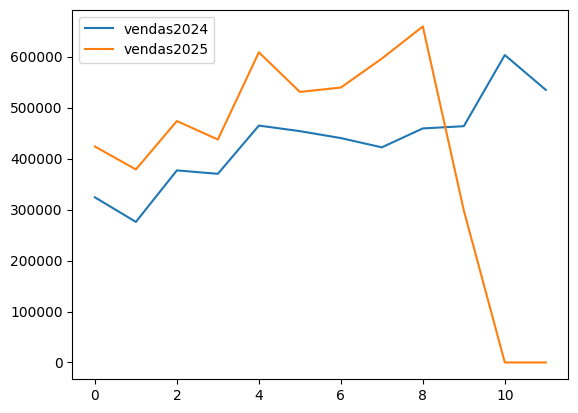

In [22]:
df_vendas2.groupby('MES_NUM')[['vendas2024','vendas2025']].sum().reset_index().plot(kind='line')

In [23]:
df_vendas2['MES_NUM'] = df_vendas2['MES_NUM'].astype('Int64')

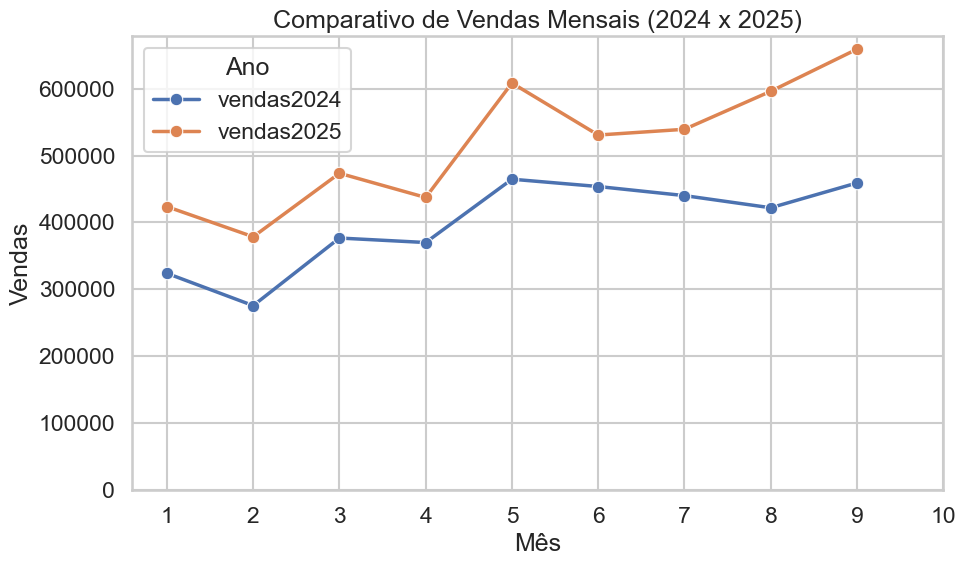

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove meses 11 e 12
df_plot = (
    df_vendas2[df_vendas2['MES_NUM'] < 10]
    .groupby('MES_NUM')[['vendas2024', 'vendas2025']]
    .sum()
    .reset_index()
)

# Converte para formato longo para uso no seaborn
df_long = df_plot.melt(id_vars='MES_NUM', value_vars=['vendas2024', 'vendas2025'],
                       var_name='Ano', value_name='Vendas')

# Gráfico com Seaborn
sns.set(style='whitegrid', context='talk')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='MES_NUM', y='Vendas', hue='Ano', marker='o', linewidth=2.5)
plt.title('Comparativo de Vendas Mensais (2024 x 2025)')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.xticks(range(1, 11))
plt.ylim(bottom=0)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()


In [25]:
df_vendas2['TRIMESTRE'] = np.ceil(df_vendas2['MES_NUM'] / 3).astype(int)

In [26]:
df_vendas2.CATEGORIA.value_counts()

CATEGORIA
PERFUMARIA     1457933
MAQUIAGEM       625165
PELE            592499
CABELO          369098
DESODORANTE     346924
SABONETE        236514
INFANTIL        203354
GIFT            123774
FACIAL           89401
ACESSORIO        64508
OLEO             52426
SOLAR            49937
BARBA            16810
PETS             16337
HOME CARE        11998
SUPORTE           5665
KIT INICIO        1585
EUDORA             578
UNHA                83
Name: count, dtype: int64

In [27]:
top5_categorias = ['PERFUMARIA','MAQUIAGEM','PELE','DESODORANTE','CABELO']
df_vendas_categ = df_vendas2[df_vendas2['CATEGORIA'].isin(top5_categorias)]

df_vendas_categ = df_vendas_categ[df_vendas_categ['MARCA']== 'BOTICARIO']

df_vendas_categ_eud = df_vendas2[df_vendas2['MARCA'] == 'EUDORA']

top_categorias_eud = df_vendas_categ_eud['CATEGORIA'].value_counts().head(5).index.tolist()

df_vendas_categ_eud = df_vendas_categ_eud[df_vendas_categ_eud['CATEGORIA'].isin(top_categorias_eud)]


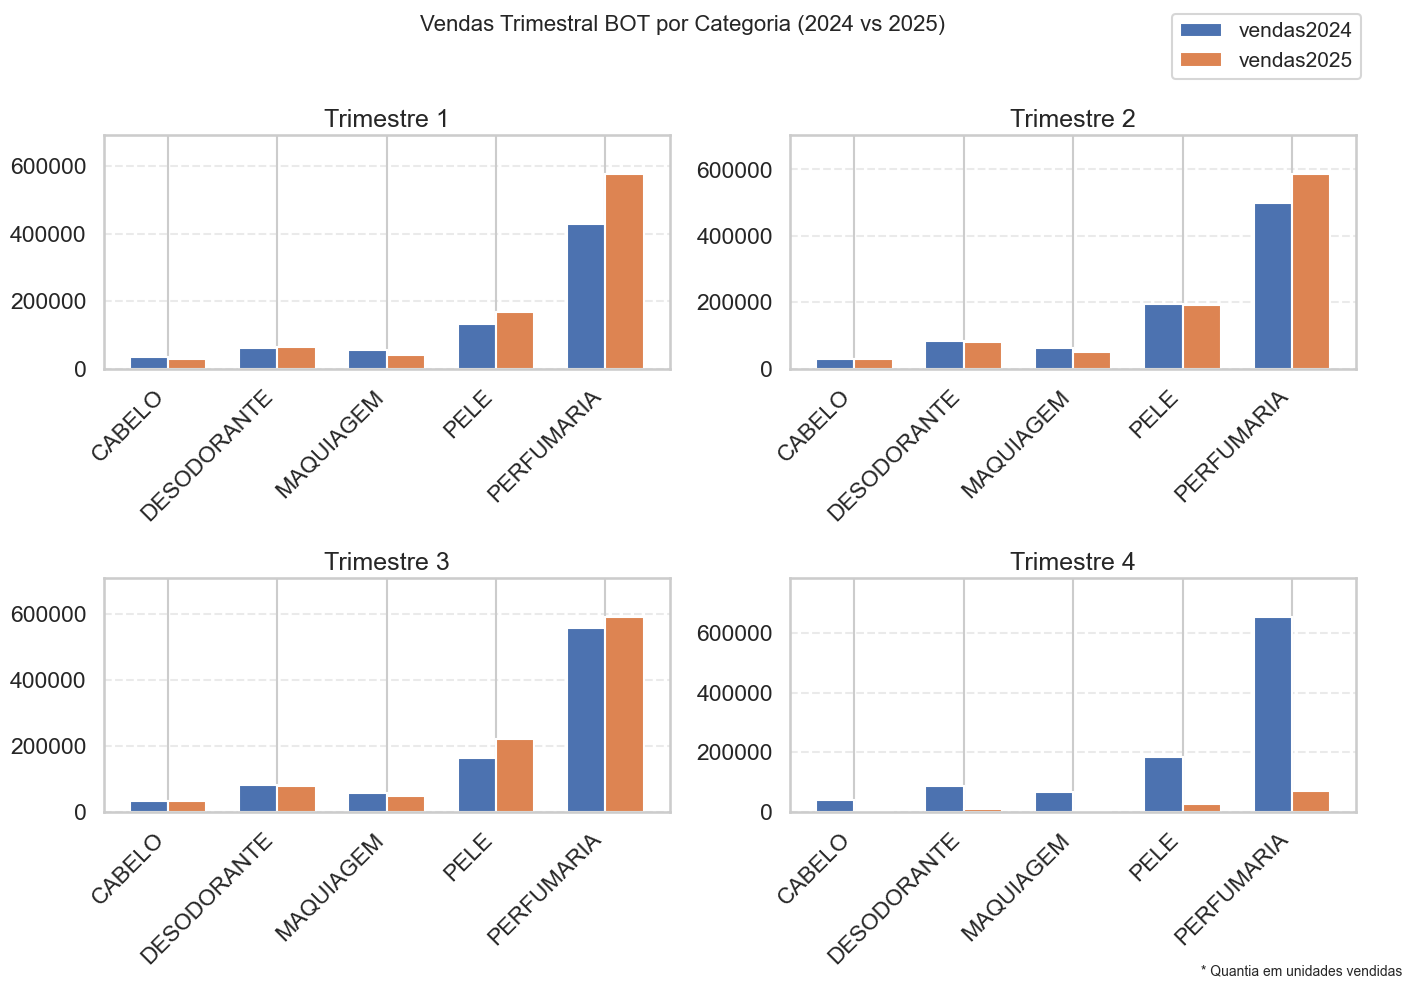

In [28]:
# file: plot_trimestres_matplotlib.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumimos que você tem um DataFrame chamado df_vendas_categ com colunas:
# 'CATEGORIA', 'TRIMESTRE', 'vendas2024', 'vendas2025'.
# Se já tiver o resultado do groupby use-o; aqui eu recomputo para garantir consistência.
df_grouped = (
    df_vendas_categ
    .groupby(['CATEGORIA', 'TRIMESTRE'])[['vendas2024', 'vendas2025']]
    .sum()
    .reset_index()
)

# Ordem consistente de categorias (preserva a ordem encontrada; pode ordenar alfabeticamente se preferir)
categorias = list(df_grouped['CATEGORIA'].unique())

# Pivot para facilitar acesso por trimestre
pivot = df_grouped.pivot(index='CATEGORIA', columns='TRIMESTRE', values=['vendas2024', 'vendas2025'])
# Após pivot, pivot[('vendas2024', t)] retorna vendas2024 do trimestre t por categoria.
# Substitui NaN por 0 para evitar erros (caso faltem categorias em algum trimestre)
pivot = pivot.fillna(0)

# Configuração do plot
n_cats = len(categorias)
x = np.arange(n_cats)  # posições no eixo x para categorias
width = 0.35  # largura das barras

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # removido sharey para permitir ylim individual
axes = axes.flatten()

# Calcular o máximo global para definir ylim
max_value = 0

for i, trimestre in enumerate([1, 2, 3, 4]):
    ax = axes[i]
    # extrair valores por categoria — garantimos a mesma ordem de categorias
    if ('vendas2024', trimestre) in pivot.columns:
        vendas24 = pivot[('vendas2024', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas24 = np.zeros(n_cats)
    
    if ('vendas2025', trimestre) in pivot.columns:
        vendas25 = pivot[('vendas2025', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas25 = np.zeros(n_cats)

    # posições das barras
    ax.bar(x - width/2, vendas24, width, label='vendas2024')
    ax.bar(x + width/2, vendas25, width, label='vendas2025')

    ax.set_title(f'Trimestre {trimestre}')
    ax.set_xticks(x)
    ax.set_xticklabels(categorias, rotation=45, ha='right')

    # Calcular máximo local e atualizar ylim para 1.2x o maior valor
    local_max = max(vendas24.max(), vendas25.max())
    max_value = max(max_value, local_max)
    ax.set_ylim(bottom=0, top=local_max * 1.2)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Legenda única (coloca fora do último axes)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.83, 0.92), ncol=1, frameon=True, fontsize='small')
fig.text(0.87, 0.02, '* Quantia em unidades vendidas',fontsize=10)

fig.suptitle('Vendas Trimestral BOT por Categoria (2024 vs 2025)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # espaço para o suptitle
plt.show()

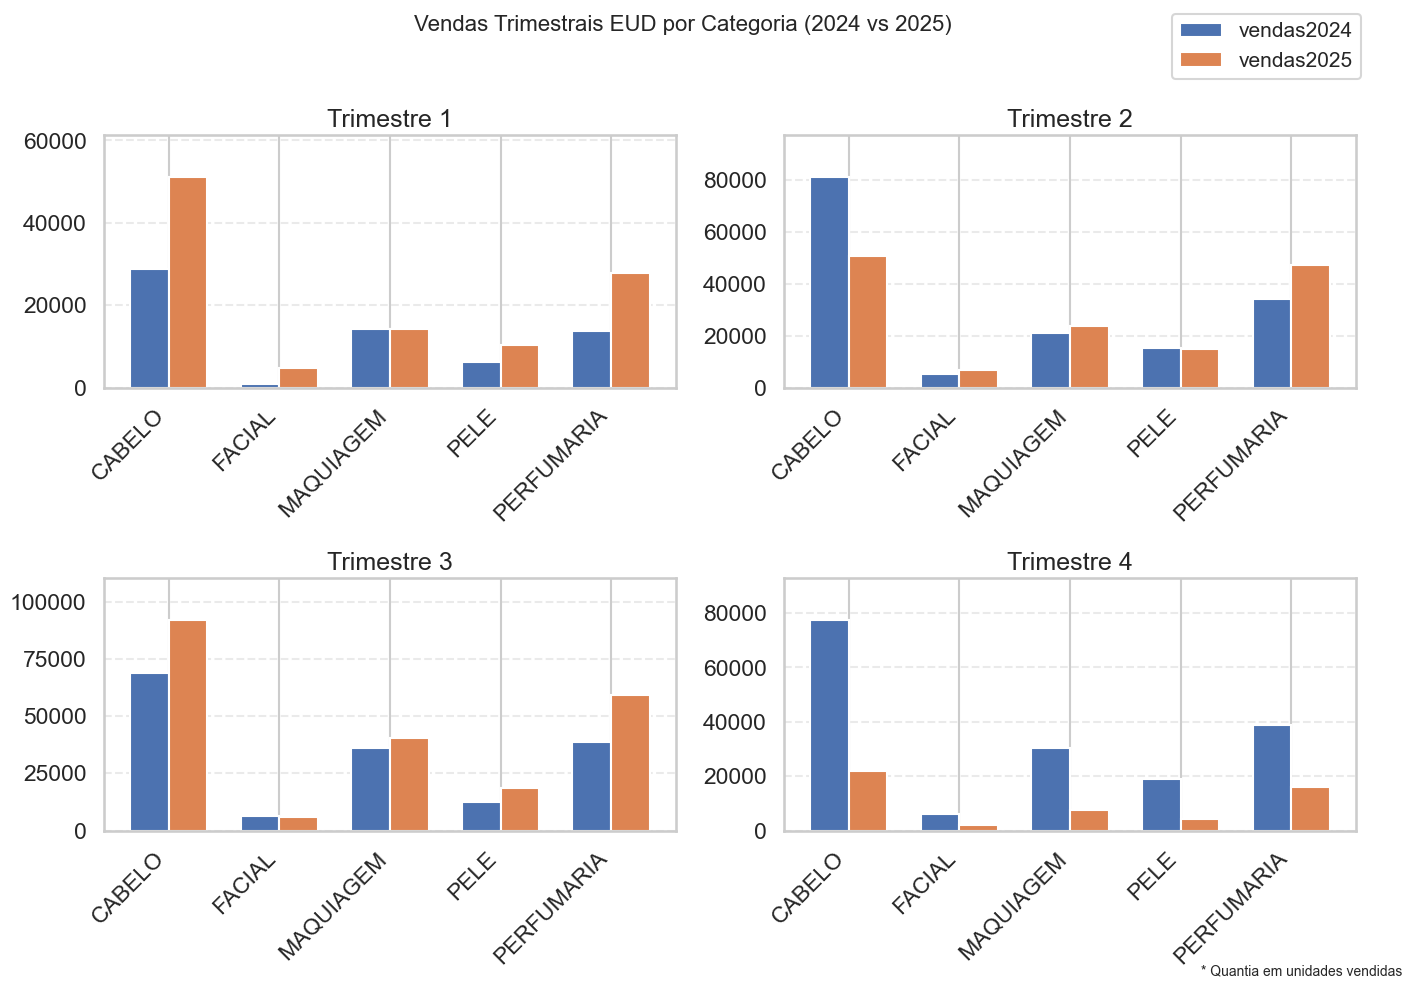

In [29]:
# file: plot_trimestres_matplotlib.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumimos que você tem um DataFrame chamado df_vendas_categ com colunas:
# 'CATEGORIA', 'TRIMESTRE', 'vendas2024', 'vendas2025'.
# Se já tiver o resultado do groupby use-o; aqui eu recomputo para garantir consistência.
df_grouped = (
    df_vendas_categ_eud
    .groupby(['CATEGORIA', 'TRIMESTRE'])[['vendas2024', 'vendas2025']]
    .sum()
    .reset_index()
)

# Ordem consistente de categorias (preserva a ordem encontrada; pode ordenar alfabeticamente se preferir)
categorias = list(df_grouped['CATEGORIA'].unique())

# Pivot para facilitar acesso por trimestre
pivot = df_grouped.pivot(index='CATEGORIA', columns='TRIMESTRE', values=['vendas2024', 'vendas2025'])
# Após pivot, pivot[('vendas2024', t)] retorna vendas2024 do trimestre t por categoria.
# Substitui NaN por 0 para evitar erros (caso faltem categorias em algum trimestre)
pivot = pivot.fillna(0)

# Configuração do plot
n_cats = len(categorias)
x = np.arange(n_cats)  # posições no eixo x para categorias
width = 0.35  # largura das barras

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # removido sharey para permitir ylim individual
axes = axes.flatten()

# Calcular o máximo global para definir ylim
max_value = 0

for i, trimestre in enumerate([1, 2, 3, 4]):
    ax = axes[i]
    # extrair valores por categoria — garantimos a mesma ordem de categorias
    if ('vendas2024', trimestre) in pivot.columns:
        vendas24 = pivot[('vendas2024', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas24 = np.zeros(n_cats)
    
    if ('vendas2025', trimestre) in pivot.columns:
        vendas25 = pivot[('vendas2025', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas25 = np.zeros(n_cats)

    # posições das barras
    ax.bar(x - width/2, vendas24, width, label='vendas2024')
    ax.bar(x + width/2, vendas25, width, label='vendas2025')

    ax.set_title(f'Trimestre {trimestre}')
    ax.set_xticks(x)
    ax.set_xticklabels(categorias, rotation=45, ha='right')

    # Calcular máximo local e atualizar ylim para 1.2x o maior valor
    local_max = max(vendas24.max(), vendas25.max())
    max_value = max(max_value, local_max)
    ax.set_ylim(bottom=0, top=local_max * 1.2)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Legenda única (coloca fora do último axes)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.83, 0.92), ncol=1, frameon=True, fontsize='small')
fig.text(0.87, 0.02, '* Quantia em unidades vendidas',fontsize=10)

fig.suptitle('Vendas Trimestrais EUD por Categoria (2024 vs 2025)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # espaço para o suptitle
plt.show()

In [30]:
top5_linhas= ['ARBO','BOTICOLLECTION','EGEO','FLORATTA','MALBEC']
df_perfumaria = df_vendas2[df_vendas2['CATEGORIA']=='PERFUMARIA']
df_perfumaria = df_perfumaria[df_perfumaria['LINHA'].isin(top5_linhas)]

df_perfumaria.groupby(['LINHA'])[['vendas2024', 'vendas2025']].sum().reset_index()

LINHA  vendas2024  vendas2025
0            ARBO      176875       98918
1  BOTICOLLECTION      197291      121789
2            EGEO      251091      163082
3        FLORATTA      320346      277117
4          MALBEC      222658      233735

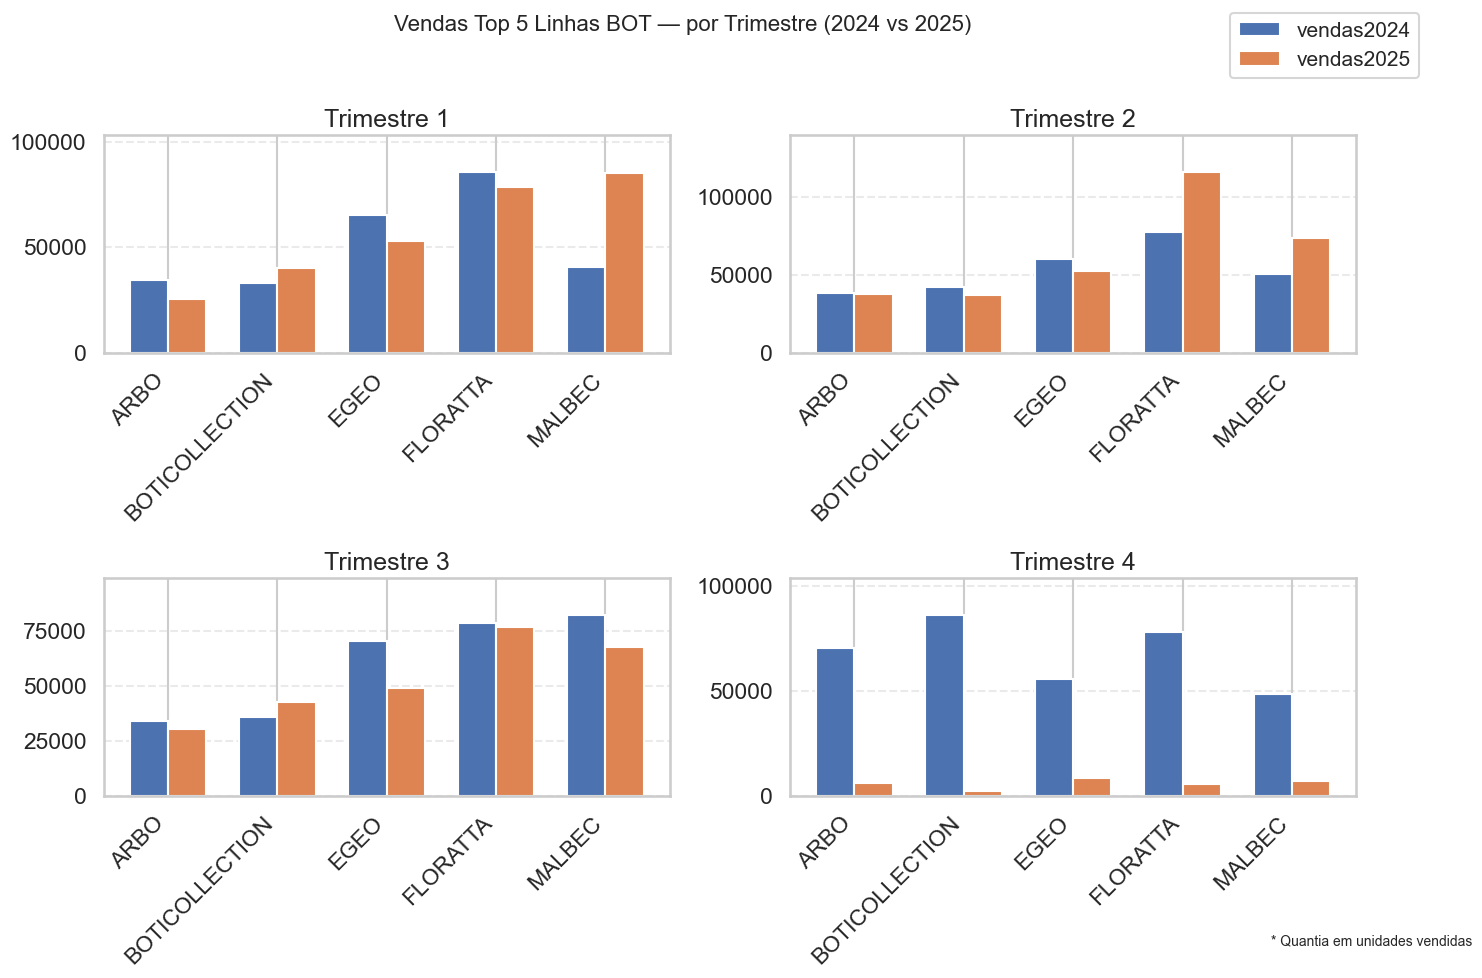

In [31]:
# file: plot_trimestres_matplotlib.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumimos que você tem um DataFrame chamado df_perfumaria com colunas:
# 'CATEGORIA', 'TRIMESTRE', 'vendas2024', 'vendas2025'.
# Se já tiver o resultado do groupby use-o; aqui eu recomputo para garantir consistência.
df_grouped2 = (
    df_perfumaria
    .groupby(['LINHA', 'TRIMESTRE'])[['vendas2024', 'vendas2025']]
    .sum()
    .reset_index()
)

# Ordem consistente de categorias (preserva a ordem encontrada; pode ordenar alfabeticamente se preferir)
categorias = list(df_grouped2['LINHA'].unique())

# Pivot para facilitar acesso por trimestre
pivot = df_grouped2.pivot(index='LINHA', columns='TRIMESTRE', values=['vendas2024', 'vendas2025'])
# Após pivot, pivot[('vendas2024', t)] retorna vendas2024 do trimestre t por categoria.
# Substitui NaN por 0 para evitar erros (caso faltem categorias em algum trimestre)
pivot = pivot.fillna(0)

# Configuração do plot
n_cats = len(categorias)
x = np.arange(n_cats)  # posições no eixo x para categorias
width = 0.35  # largura das barras

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # removido sharey para permitir ylim individual
axes = axes.flatten()

# Calcular o máximo global para definir ylim
max_value = 0

for i, trimestre in enumerate([1, 2, 3, 4]):
    ax = axes[i]
    # extrair valores por categoria — garantimos a mesma ordem de categorias
    if ('vendas2024', trimestre) in pivot.columns:
        vendas24 = pivot[('vendas2024', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas24 = np.zeros(n_cats)
    
    if ('vendas2025', trimestre) in pivot.columns:
        vendas25 = pivot[('vendas2025', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas25 = np.zeros(n_cats)

    # posições das barras
    ax.bar(x - width/2, vendas24, width, label='vendas2024')
    ax.bar(x + width/2, vendas25, width, label='vendas2025')

    ax.set_title(f'Trimestre {trimestre}')
    ax.set_xticks(x)
    ax.set_xticklabels(categorias, rotation=45, ha='right')

    # Calcular máximo local e atualizar ylim para 1.2x o maior valor
    local_max = max(vendas24.max(), vendas25.max())
    max_value = max(max_value, local_max)
    ax.set_ylim(bottom=0, top=local_max * 1.2)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Legenda única (coloca fora do último axes)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.83, 0.92), ncol=1, frameon=True, fontsize='small')
fig.text(0.92, 0.05, '* Quantia em unidades vendidas',fontsize=10)


fig.suptitle('Vendas Top 5 Linhas BOT — por Trimestre (2024 vs 2025)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # espaço para o suptitle

plt.show()

In [32]:
top5_linhas_EUD= ['DIVA','CLUB','PULSE','INSTANCE','EUD']
df_perfumaria_eud = df_vendas_categ_eud[df_vendas_categ_eud['CATEGORIA']=='PERFUMARIA']
df_perfumaria_eud = df_perfumaria_eud[df_perfumaria_eud['LINHA'].isin(top5_linhas_EUD)]

df_perfumaria_eud.groupby(['LINHA'])[['vendas2024', 'vendas2025']].sum().reset_index()

LINHA  vendas2024  vendas2025
0      CLUB       14320       23091
1      DIVA       17556       23991
2       EUD       26609       30445
3  INSTANCE        8692        9031
4     PULSE       13408       12455

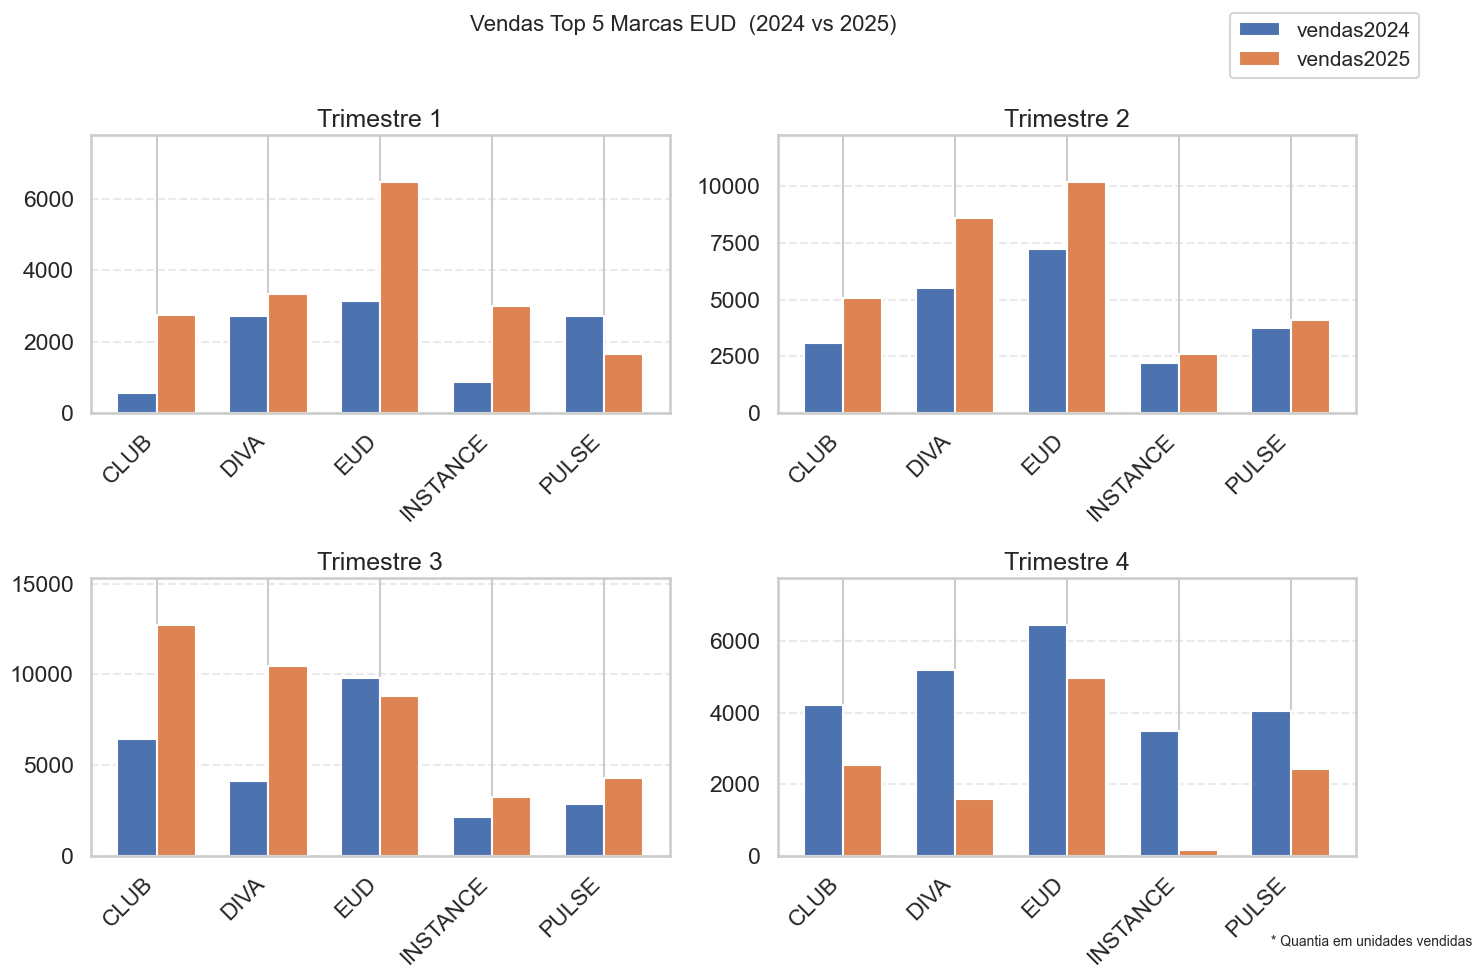

In [33]:
# file: plot_trimestres_matplotlib.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumimos que você tem um DataFrame chamado df_perfumaria com colunas:
# 'CATEGORIA', 'TRIMESTRE', 'vendas2024', 'vendas2025'.
# Se já tiver o resultado do groupby use-o; aqui eu recomputo para garantir consistência.
df_grouped3 = (
    df_perfumaria_eud
    .groupby(['LINHA', 'TRIMESTRE'])[['vendas2024', 'vendas2025']]
    .sum()
    .reset_index()
)

# Ordem consistente de categorias (preserva a ordem encontrada; pode ordenar alfabeticamente se preferir)
categorias = list(df_grouped3['LINHA'].unique())

# Pivot para facilitar acesso por trimestre
pivot = df_grouped3.pivot(index='LINHA', columns='TRIMESTRE', values=['vendas2024', 'vendas2025'])
# Após pivot, pivot[('vendas2024', t)] retorna vendas2024 do trimestre t por categoria.
# Substitui NaN por 0 para evitar erros (caso faltem categorias em algum trimestre)
pivot = pivot.fillna(0)

# Configuração do plot
n_cats = len(categorias)
x = np.arange(n_cats)  # posições no eixo x para categorias
width = 0.35  # largura das barras

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # removido sharey para permitir ylim individual
axes = axes.flatten()

# Calcular o máximo global para definir ylim
max_value = 0

for i, trimestre in enumerate([1, 2, 3, 4]):
    ax = axes[i]
    # extrair valores por categoria — garantimos a mesma ordem de categorias
    if ('vendas2024', trimestre) in pivot.columns:
        vendas24 = pivot[('vendas2024', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas24 = np.zeros(n_cats)
    
    if ('vendas2025', trimestre) in pivot.columns:
        vendas25 = pivot[('vendas2025', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas25 = np.zeros(n_cats)

    # posições das barras
    ax.bar(x - width/2, vendas24, width, label='vendas2024')
    ax.bar(x + width/2, vendas25, width, label='vendas2025')

    ax.set_title(f'Trimestre {trimestre}')
    ax.set_xticks(x)
    ax.set_xticklabels(categorias, rotation=45, ha='right')

    # Calcular máximo local e atualizar ylim para 1.2x o maior valor
    local_max = max(vendas24.max(), vendas25.max())
    max_value = max(max_value, local_max)
    ax.set_ylim(bottom=0, top=local_max * 1.2)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Legenda única (coloca fora do último axes)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.83, 0.92), ncol=1, frameon=True, fontsize='small')
fig.text(0.92, 0.05, '* Quantia em unidades vendidas',fontsize=10)


fig.suptitle('Vendas Top 5 Marcas EUD  (2024 vs 2025)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # espaço para o suptitle

plt.show()

In [34]:
bot5_linhas= ['DR BOTICA','INSENSATEZ','ELYSEE','MEN','THE BLEND']
df_perfumaria_b5 = df_vendas2[df_vendas2['CATEGORIA']=='PERFUMARIA']

df_perfumaria_b5 = df_perfumaria_b5[df_perfumaria_b5['LINHA'].isin(bot5_linhas)]

df_perfumaria_b5.groupby(['LINHA'])[['vendas2024', 'vendas2025']].sum()

vendas2024  vendas2025
LINHA                             
DR BOTICA        14731       19288
ELYSEE           14919       20577
INSENSATEZ       10471        6594
MEN              16412        9884
THE BLEND        16013       16249

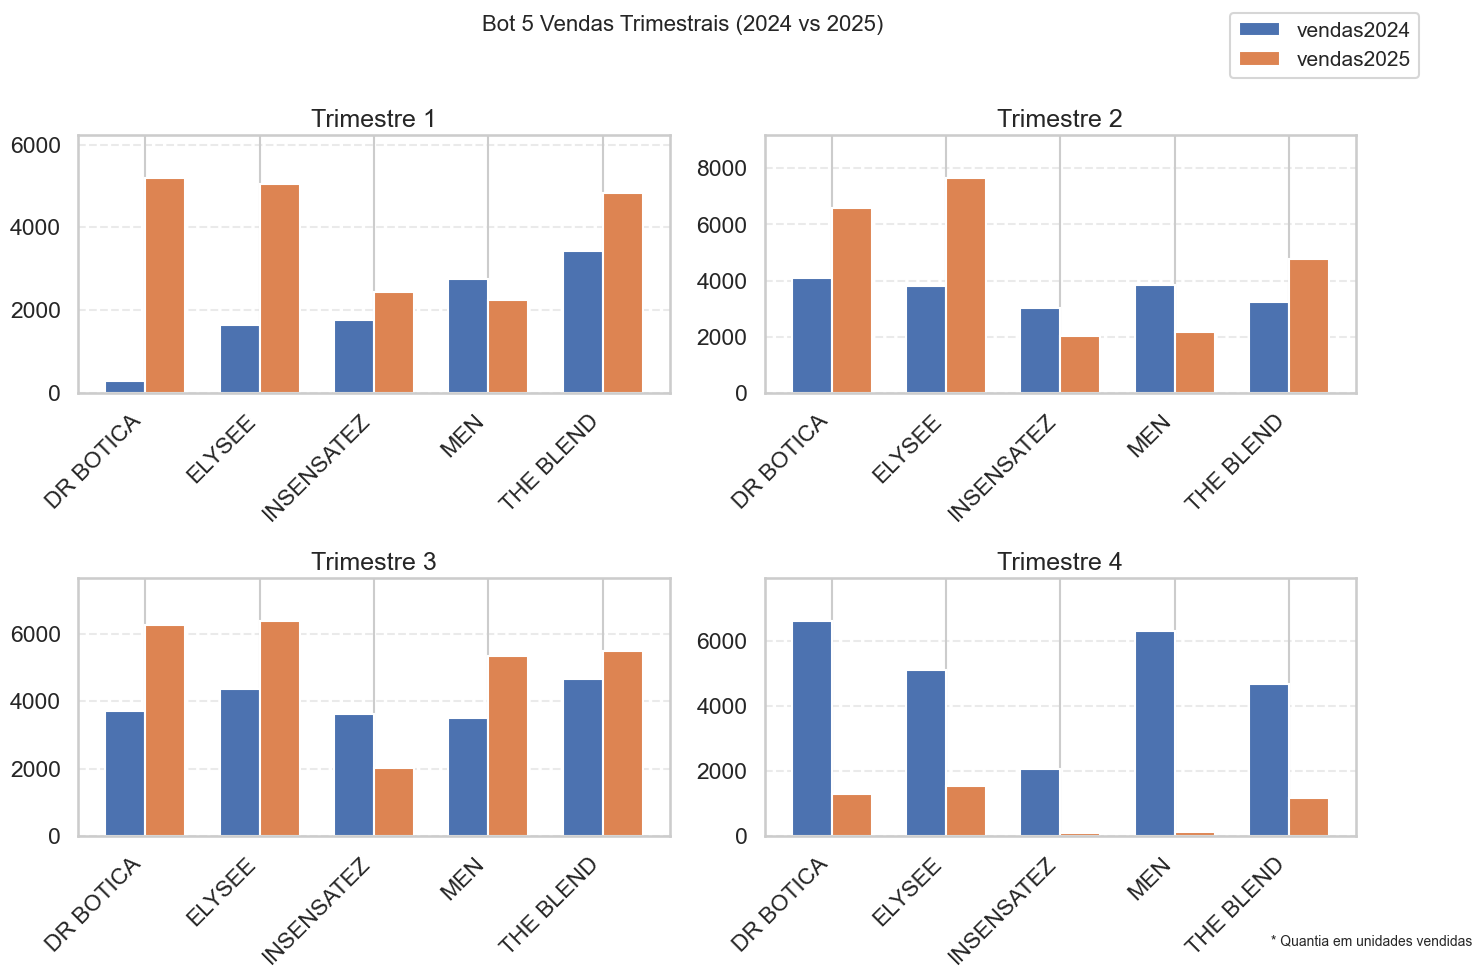

In [35]:
# file: plot_trimestres_matplotlib.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumimos que você tem um DataFrame chamado df_perfumaria com colunas:
# 'CATEGORIA', 'TRIMESTRE', 'vendas2024', 'vendas2025'.
# Se já tiver o resultado do groupby use-o; aqui eu recomputo para garantir consistência.
df_grouped3 = (
    df_perfumaria_b5
    .groupby(['LINHA', 'TRIMESTRE'])[['vendas2024', 'vendas2025']]
    .sum()
    .reset_index()
)

# Ordem consistente de categorias (preserva a ordem encontrada; pode ordenar alfabeticamente se preferir)
categorias = list(df_grouped3['LINHA'].unique())

# Pivot para facilitar acesso por trimestre
pivot = df_grouped3.pivot(index='LINHA', columns='TRIMESTRE', values=['vendas2024', 'vendas2025'])
# Após pivot, pivot[('vendas2024', t)] retorna vendas2024 do trimestre t por categoria.
# Substitui NaN por 0 para evitar erros (caso faltem categorias em algum trimestre)
pivot = pivot.fillna(0)

# Configuração do plot
n_cats = len(categorias)
x = np.arange(n_cats)  # posições no eixo x para categorias
width = 0.35  # largura das barras

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # removido sharey para permitir ylim individual
axes = axes.flatten()

# Calcular o máximo global para definir ylim
max_value = 0

for i, trimestre in enumerate([1, 2, 3, 4]):
    ax = axes[i]
    # extrair valores por categoria — garantimos a mesma ordem de categorias
    if ('vendas2024', trimestre) in pivot.columns:
        vendas24 = pivot[('vendas2024', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas24 = np.zeros(n_cats)
    
    if ('vendas2025', trimestre) in pivot.columns:
        vendas25 = pivot[('vendas2025', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas25 = np.zeros(n_cats)

    # posições das barras
    ax.bar(x - width/2, vendas24, width, label='vendas2024')
    ax.bar(x + width/2, vendas25, width, label='vendas2025')

    ax.set_title(f'Trimestre {trimestre}')
    ax.set_xticks(x)
    ax.set_xticklabels(categorias, rotation=45, ha='right')

    # Calcular máximo local e atualizar ylim para 1.2x o maior valor
    local_max = max(vendas24.max(), vendas25.max())
    max_value = max(max_value, local_max)
    ax.set_ylim(bottom=0, top=local_max * 1.2)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Legenda única (coloca fora do último axes)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.83, 0.92), ncol=1, frameon=True, fontsize='small')
fig.text(0.92, 0.05, '* Quantia em unidades vendidas',fontsize=10)

fig.suptitle('Bot 5 Vendas Trimestrais (2024 vs 2025)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # espaço para o suptitle

plt.show()

In [36]:
df_pdv = pd.read_excel(r"C:\Users\joao.herculano\Documents\PDV_ATT.xlsx")

df_pdv['PDV'] = df_pdv['PDV'].astype('str')
df_pdv

PDV CANAL                     DESCRIÇÃO  \
0    23156    LJ           SHOPPING CENTRO SUL   
1     4494   MTZ                    ESCRITORIO   
2     1137   MTZ                           AMG   
3    12522    LJ               MACEIO SHOP EXP   
4    12817    LJ                SHOPPING PATIO   
..     ...   ...                           ...   
81   24269    VD          COMERCIO-ER JACOBINA   
82   24293   HIB  COMERCIO-HIB MORRO DO CHAPEU   
83  910173    LJ               QDB PARQUE SHOP   
84  910291    LJ               QDB MACEIO SHOP   
85   23813   HIB                       VALENTE   

                                PDV DESC     REGIÃO   ESTADO  CIDADE   UF  \
0                                    NaN        NaN  SERGIPE     NaN   SE   
1       4494-COMERCIO-PONTA VERDE-MACEIO         ND  ALAGOAS  MACEIÓ   AL   
2                      1137-AMG SERRARIA         ND  ALAGOAS  MACEIÓ   AL   
3   12522-COMERCIO -MACEIO SHOP EXPANSAO  MCZ BAIXA  ALAGOAS  MACEIÓ   AL   
4         12817-COMERCIO -SHOPPING PATIO   MCZ ALTA  ALAGOAS  MACEIÓ   AL   
..                                   ...        ...      ...     ...  ...   
81                                   NaN        NaN      NaN     NaN  BA3   
82                                   NaN        NaN      NaN     NaN  BA3   
83                                   NaN        NaN      NaN     NaN   AL   
84                                   NaN        NaN      NaN     NaN   AL   
85                                   NaN        NaN      NaN     NaN   BA   

          MARCA   ANALISTA           GESTÃO          SUPERVISOR   STATUS  \
0           NaN    Inativa          Inativa             Inativa  INATIVO   
1    CP GINSENG    Inativa          Inativa             Inativa  INATIVO   
2   O BOTICARIO    Inativa          Inativa             Inativa  INATIVO   
3   O BOTICARIO       LUAN      Betina Melo  Efigênia Herculano    ATIVO   
4   O BOTICARIO  JEFFERSON  Pamella Barbosa      Maxwell Vieira    ATIVO   
..          ...        ...              ...                 ...      ...   
81  O BOTICARIO  JEFFERSON       Caio Luna             FERNANDA    ATIVO   
82  O BOTICARIO   MARCYARA          Alysson            FERNANDA    ATIVO   
83  O BOTICARIO     DIELLY              NaN                 NaN    ATIVO   
84  O BOTICARIO     DIELLY              NaN                 NaN    ATIVO   
85  O BOTICARIO   MARCYARA              NaN             CLÁUDIA    ATIVO   

   ANALISTA EUD  
0          LOJA  
1       INATIVO  
2       INATIVO  
3          LOJA  
4          LOJA  
..          ...  
81         HARY  
82       DIELLY  
83         LOJA  
84         LOJA  
85         HARY  

[86 rows x 14 columns]

In [37]:
df_vendas3 = pd.merge(df_vendas2,df_pdv[['PDV','UF','CANAL']],left_on='pdv',right_on='PDV',how='left')

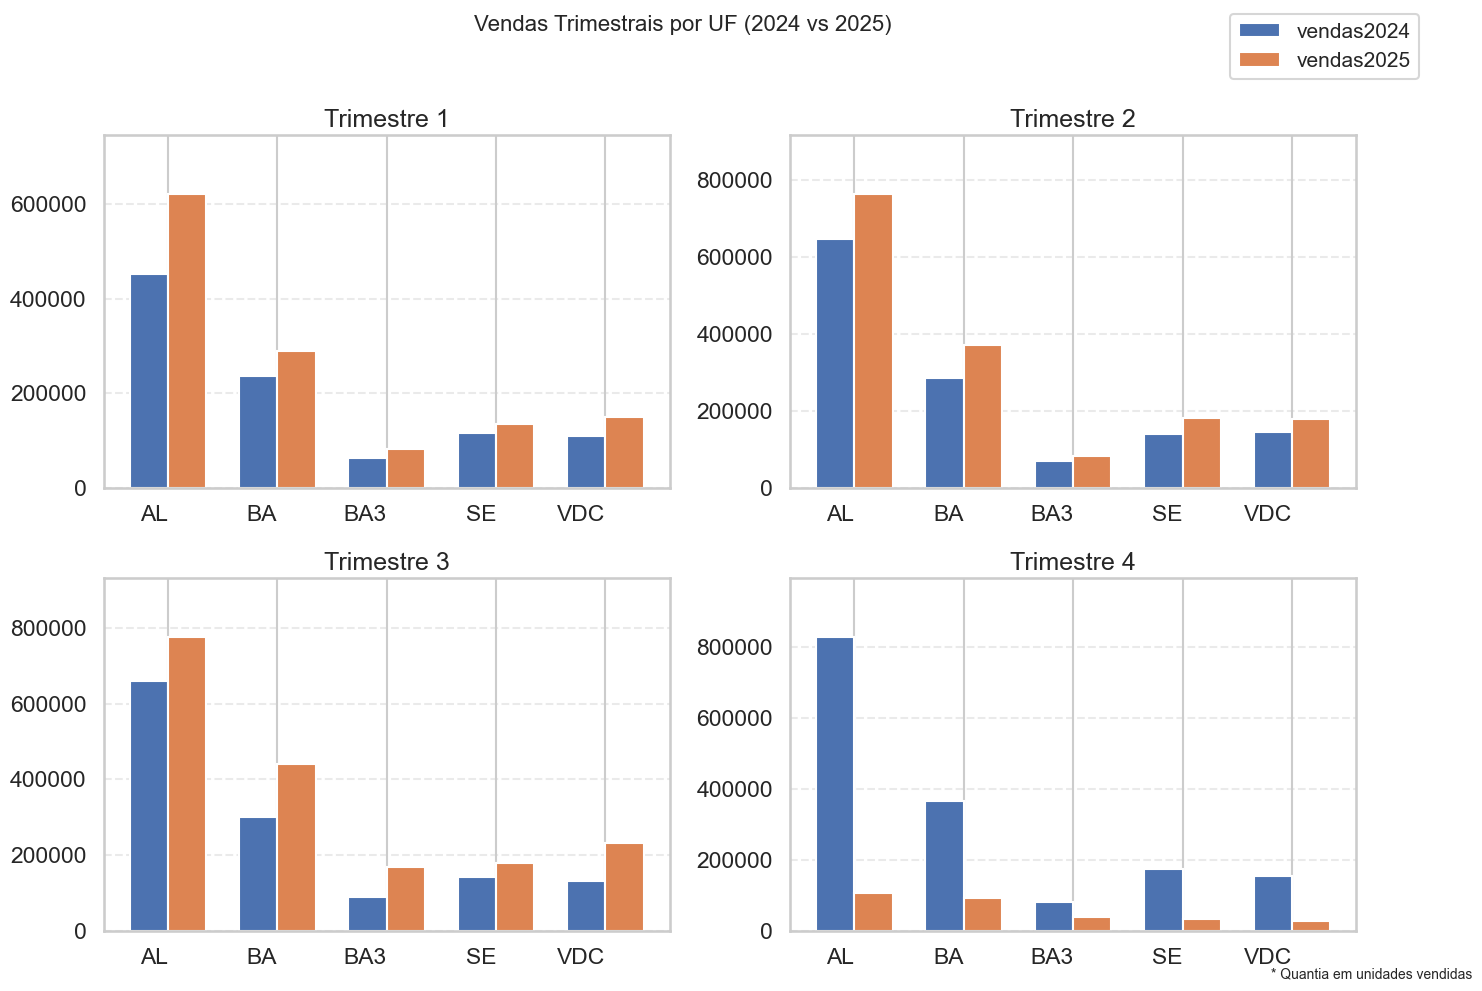

In [42]:
# file: plot_trimestres_matplotlib.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumimos que você tem um DataFrame chamado df_perfumaria com colunas:
# 'CATEGORIA', 'TRIMESTRE', 'vendas2024', 'vendas2025'.
# Se já tiver o resultado do groupby use-o; aqui eu recomputo para garantir consistência.
df_grouped4 = (
    df_vendas3
    .groupby(['UF', 'TRIMESTRE'])[['vendas2024', 'vendas2025']]
    .sum()
    .reset_index()
)

# Ordem consistente de categorias (preserva a ordem encontrada; pode ordenar alfabeticamente se preferir)
categorias = list(df_grouped4['UF'].unique())

# Pivot para facilitar acesso por trimestre
pivot = df_grouped4.pivot(index='UF', columns='TRIMESTRE', values=['vendas2024', 'vendas2025'])
# Após pivot, pivot[('vendas2024', t)] retorna vendas2024 do trimestre t por categoria.
# Substitui NaN por 0 para evitar erros (caso faltem categorias em algum trimestre)
pivot = pivot.fillna(0)

# Configuração do plot
n_cats = len(categorias)
x = np.arange(n_cats)  # posições no eixo x para categorias
width = 0.35  # largura das barras

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # removido sharey para permitir ylim individual
axes = axes.flatten()

# Calcular o máximo global para definir ylim
max_value = 0

for i, trimestre in enumerate([1, 2, 3, 4]):
    ax = axes[i]
    # extrair valores por categoria — garantimos a mesma ordem de categorias
    if ('vendas2024', trimestre) in pivot.columns:
        vendas24 = pivot[('vendas2024', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas24 = np.zeros(n_cats)
    
    if ('vendas2025', trimestre) in pivot.columns:
        vendas25 = pivot[('vendas2025', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas25 = np.zeros(n_cats)

    # posições das barras
    ax.bar(x - width/2, vendas24, width, label='vendas2024')
    ax.bar(x + width/2, vendas25, width, label='vendas2025')

    ax.set_title(f'Trimestre {trimestre}')
    ax.set_xticks(x)
    ax.set_xticklabels(categorias, rotation=0, ha='right')

    # Calcular máximo local e atualizar ylim para 1.2x o maior valor
    local_max = max(vendas24.max(), vendas25.max())
    max_value = max(max_value, local_max)
    ax.set_ylim(bottom=0, top=local_max * 1.2)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Legenda única (coloca fora do último axes)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.83, 0.92), ncol=1, frameon=True, fontsize='small')
fig.text(0.92, 0.017, '* Quantia em unidades vendidas',fontsize=10)

fig.suptitle('Vendas Trimestrais por UF (2024 vs 2025)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # espaço para o suptitle

plt.show()

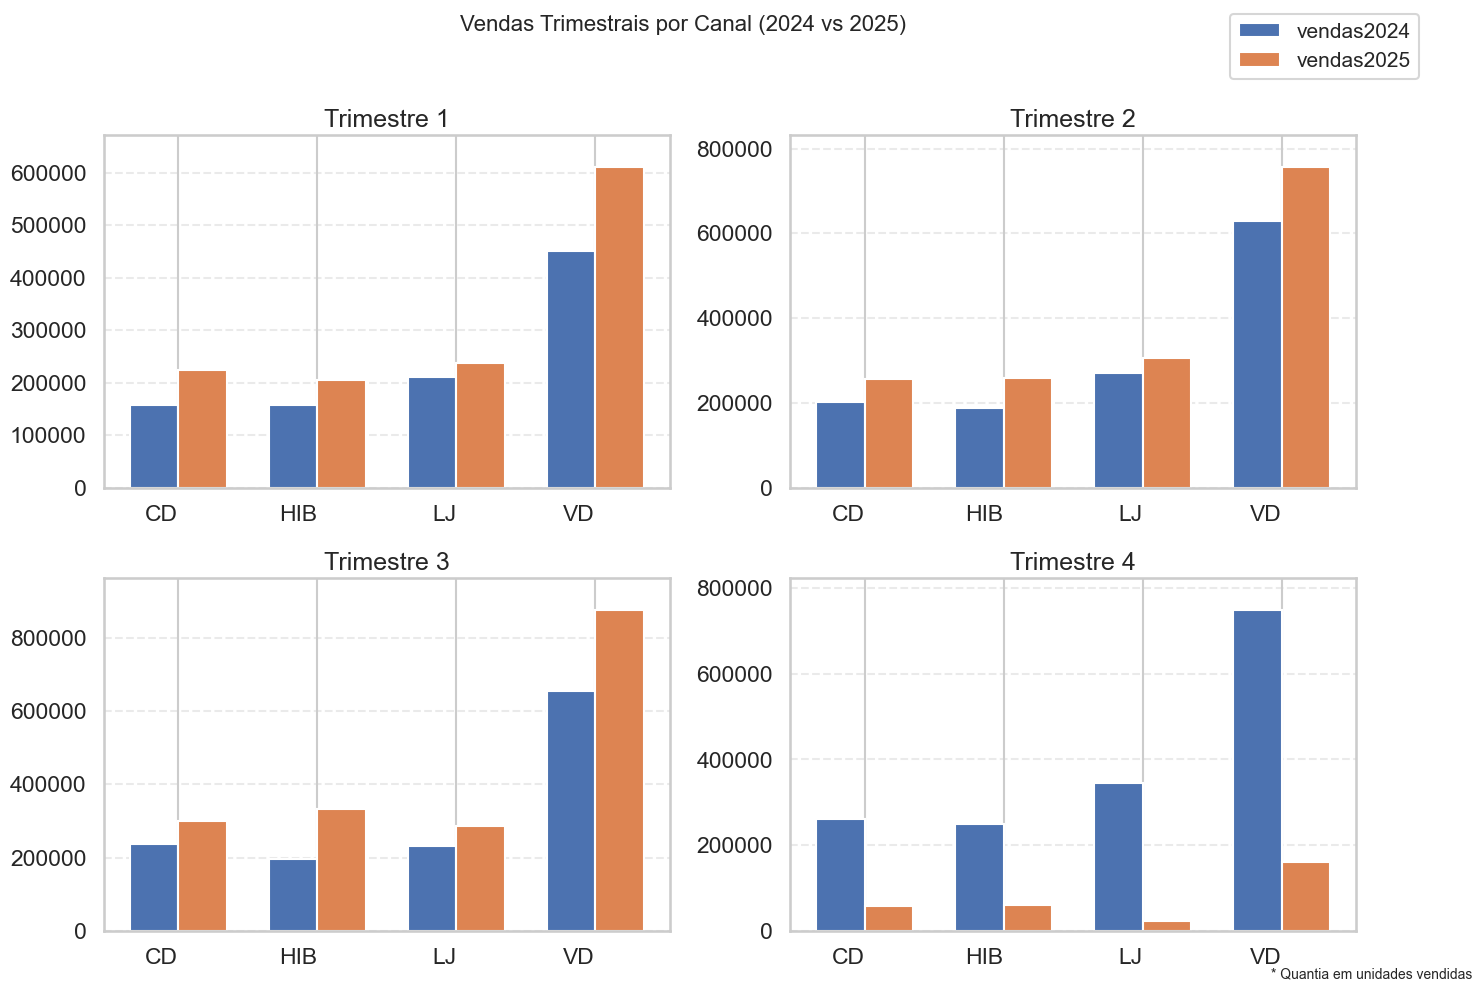

In [41]:
# file: plot_trimestres_matplotlib.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumimos que você tem um DataFrame chamado df_perfumaria com colunas:
# 'CATEGORIA', 'TRIMESTRE', 'vendas2024', 'vendas2025'.
# Se já tiver o resultado do groupby use-o; aqui eu recomputo para garantir consistência.
df_grouped5 = (
    df_vendas3
    .groupby(['CANAL', 'TRIMESTRE'])[['vendas2024', 'vendas2025']]
    .sum()
    .reset_index()
)

# Ordem consistente de categorias (preserva a ordem encontrada; pode ordenar alfabeticamente se preferir)
categorias = list(df_grouped5['CANAL'].unique())

# Pivot para facilitar acesso por trimestre
pivot = df_grouped5.pivot(index='CANAL', columns='TRIMESTRE', values=['vendas2024', 'vendas2025'])
# Após pivot, pivot[('vendas2024', t)] retorna vendas2024 do trimestre t por categoria.
# Substitui NaN por 0 para evitar erros (caso faltem categorias em algum trimestre)
pivot = pivot.fillna(0)

# Configuração do plot
n_cats = len(categorias)
x = np.arange(n_cats)  # posições no eixo x para categorias
width = 0.35  # largura das barras

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # removido sharey para permitir ylim individual
axes = axes.flatten()

# Calcular o máximo global para definir ylim
max_value = 0

for i, trimestre in enumerate([1, 2, 3, 4]):
    ax = axes[i]
    # extrair valores por categoria — garantimos a mesma ordem de categorias
    if ('vendas2024', trimestre) in pivot.columns:
        vendas24 = pivot[('vendas2024', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas24 = np.zeros(n_cats)
    
    if ('vendas2025', trimestre) in pivot.columns:
        vendas25 = pivot[('vendas2025', trimestre)].reindex(categorias).fillna(0).values
    else:
        vendas25 = np.zeros(n_cats)

    # posições das barras
    ax.bar(x - width/2, vendas24, width, label='vendas2024')
    ax.bar(x + width/2, vendas25, width, label='vendas2025')

    ax.set_title(f'Trimestre {trimestre}')
    ax.set_xticks(x)
    ax.set_xticklabels(categorias, rotation=0, ha='right')

    # Calcular máximo local e atualizar ylim para 1.2x o maior valor
    local_max = max(vendas24.max(), vendas25.max())
    max_value = max(max_value, local_max)
    ax.set_ylim(bottom=0, top=local_max * 1.1)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Legenda única (coloca fora do último axes)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.83, 0.92), ncol=1, frameon=True, fontsize='small')
fig.text(0.92, 0.017, '* Quantia em unidades vendidas',fontsize=10)

fig.suptitle('Vendas Trimestrais por Canal (2024 vs 2025)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # espaço para o suptitle

plt.show()

Adicionar a Ruptura Bruta média nos trimestres